In [1]:
library(gprofiler2)
library(ggplot2)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)

Loading required package: grid
ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

circlize version 0.4.9
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



In [2]:
weights_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/mofa_weights.csv"
weights = read.csv(weights_filename, row.names = 1)
colnames(weights) = paste0("MOFA",1:20)
head(weights)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
ENSG00000002330_BAD,0.30934894,-0.4034091,-0.3349486,-0.2318855,0.11168643,-0.12143625,-0.009702369,-0.007215751,0.2035403,0.04253166,0.21457806,-0.0009146607,0.02093800,-0.15880118,-0.08771437,0.035739140,-0.07575171,-0.039572605,0.029645248,0.033884276
ENSG00000002586_CD99,0.95578522,-0.5517956,-0.0618570,-0.2964902,0.01255165,0.06366483,0.054979317,0.323429541,-0.2054521,0.23191786,0.17663677,-0.0017963665,0.14901920,-0.06168571,-0.07510263,0.036791980,-0.07772768,-0.119288757,-0.002683093,-0.089087734
ENSG00000003402_CFLAR,1.60930878,-0.7140005,-0.1107043,-0.1048422,-0.20139884,0.09924553,0.060097970,0.142381177,-0.1149825,0.21103914,-0.08778064,-0.0793384054,0.04175990,-0.08241088,0.03522966,0.003755666,-0.06309200,-0.054066104,0.024374592,-0.001804685
ENSG00000006327_TNFRSF12A,-0.09152902,-0.4188715,-0.5306372,0.1871893,0.68042035,0.04022752,0.173706739,-0.205642627,0.2622127,-0.04216844,-0.26900973,-0.0237146297,0.09965422,-0.26647649,-0.21856795,-0.039886799,0.05216379,-0.003976360,-0.066724516,-0.003094204
ENSG00000007520_TSR3,-0.12102057,-0.1050428,-0.2690497,-0.3300890,0.22453984,-0.10240814,0.162667053,0.400854380,0.1518699,-0.59064097,-0.12948751,-0.0430301533,-0.06188766,0.11984256,0.12327026,0.014822145,0.13185726,-0.009679009,0.121840908,0.095755672
ENSG00000010278_CD9,-1.56337876,0.1397504,0.1667011,-0.6007324,0.28261315,0.32106642,0.081328178,0.033254828,0.2906323,0.39733183,-0.14071936,-0.0455260759,0.21435229,0.02013874,-0.07679886,0.189348457,-0.04202992,0.043036803,-0.244793871,-0.120458037


In [3]:
genes_8 = weights[,8]
names(genes_8) = rownames(weights)
genes = names(genes_8[order(genes_8, decreasing = T)])
head(genes,30)

[1] "ENSG00000125148_MT2A"     "ENSG00000185338_SOCS1"   
 [3] "ENSG00000125144_MT1G"     "ENSG00000198417_MT1F"    
 [5] "ENSG00000104852_SNRNP70"  "ENSG00000115457_IGFBP2"  
 [7] "ENSG00000175602_CCDC85B"  "ENSG00000187193_MT1X"    
 [9] "ENSG00000197982_C1orf122" "ENSG00000116649_SRM"     
[11] "ENSG00000158825_CDA"      "ENSG00000147403_RPL10"   
[13] "ENSG00000099860_GADD45B"  "ENSG00000119782_FKBP1B"  
[15] "ENSG00000026559_KCNG1"    "ENSG00000187260_WDR86"   
[17] "ENSG00000250361_GYPB"     "ENSG00000197465_GYPE"    
[19] "ENSG00000108106_UBE2S"    "ENSG00000185155_MIXL1"   
[21] "ENSG00000053438_NNAT"     "ENSG00000134363_FST"     
[23] "ENSG00000168061_SAC3D1"   "ENSG00000144485_HES6"    
[25] "ENSG00000143320_CRABP2"   "ENSG00000099804_CDC34"   
[27] "ENSG00000160813_PPP1R35"  "ENSG00000115163_CENPA"   
[29] "ENSG00000164292_RHOBTB3"  "ENSG00000069482_GAL"

In [4]:
genes_10 = weights[,10]
names(genes_10) = rownames(weights)
genes = names(genes_10[order(genes_10, decreasing = T)])
head(genes,30)

[1] "ENSG00000125148_MT2A"     "ENSG00000125144_MT1G"    
 [3] "ENSG00000198417_MT1F"     "ENSG00000053438_NNAT"    
 [5] "ENSG00000187193_MT1X"     "ENSG00000166426_CRABP1"  
 [7] "ENSG00000111704_NANOG"    "ENSG00000156574_NODAL"   
 [9] "ENSG00000158825_CDA"      "ENSG00000143320_CRABP2"  
[11] "ENSG00000109255_NMU"      "ENSG00000010278_CD9"     
[13] "ENSG00000104626_ERI1"     "ENSG00000162344_FGF19"   
[15] "ENSG00000176014_TUBB6"    "ENSG00000176171_BNIP3"   
[17] "ENSG00000243709_LEFTY1"   "ENSG00000042493_CAPG"    
[19] "ENSG00000164093_PITX2"    "ENSG00000171124_FUT3"    
[21] "ENSG00000095596_CYP26A1"  "ENSG00000185885_IFITM1"  
[23] "ENSG00000184344_GDF3"     "ENSG00000130066_SAT1"    
[25] "ENSG00000124575_HIST1H1D" "ENSG00000158427_TMSB15B" 
[27] "ENSG00000168476_REEP4"    "ENSG00000197747_S100A10" 
[29] "ENSG00000079215_SLC1A3"   "ENSG00000204531_POU5F1"

In [5]:
weights = weights[,1:10]

In [6]:
df_list = list()
for (i in 1:ncol(weights)){
    gene_list = weights[,i]
    names(gene_list) = rownames(weights)
    # order
    genes = gene_list[order(gene_list, decreasing = T)]
    # get gene names only
    genes = gsub(".*_","",names(genes))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [7]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05,]
#     print(nrow(df_curr))
    n = min(20, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}

In [8]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    factor = paste0("MOFA",(i))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$factor = factor
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","factor","term_name","term_id")])
}

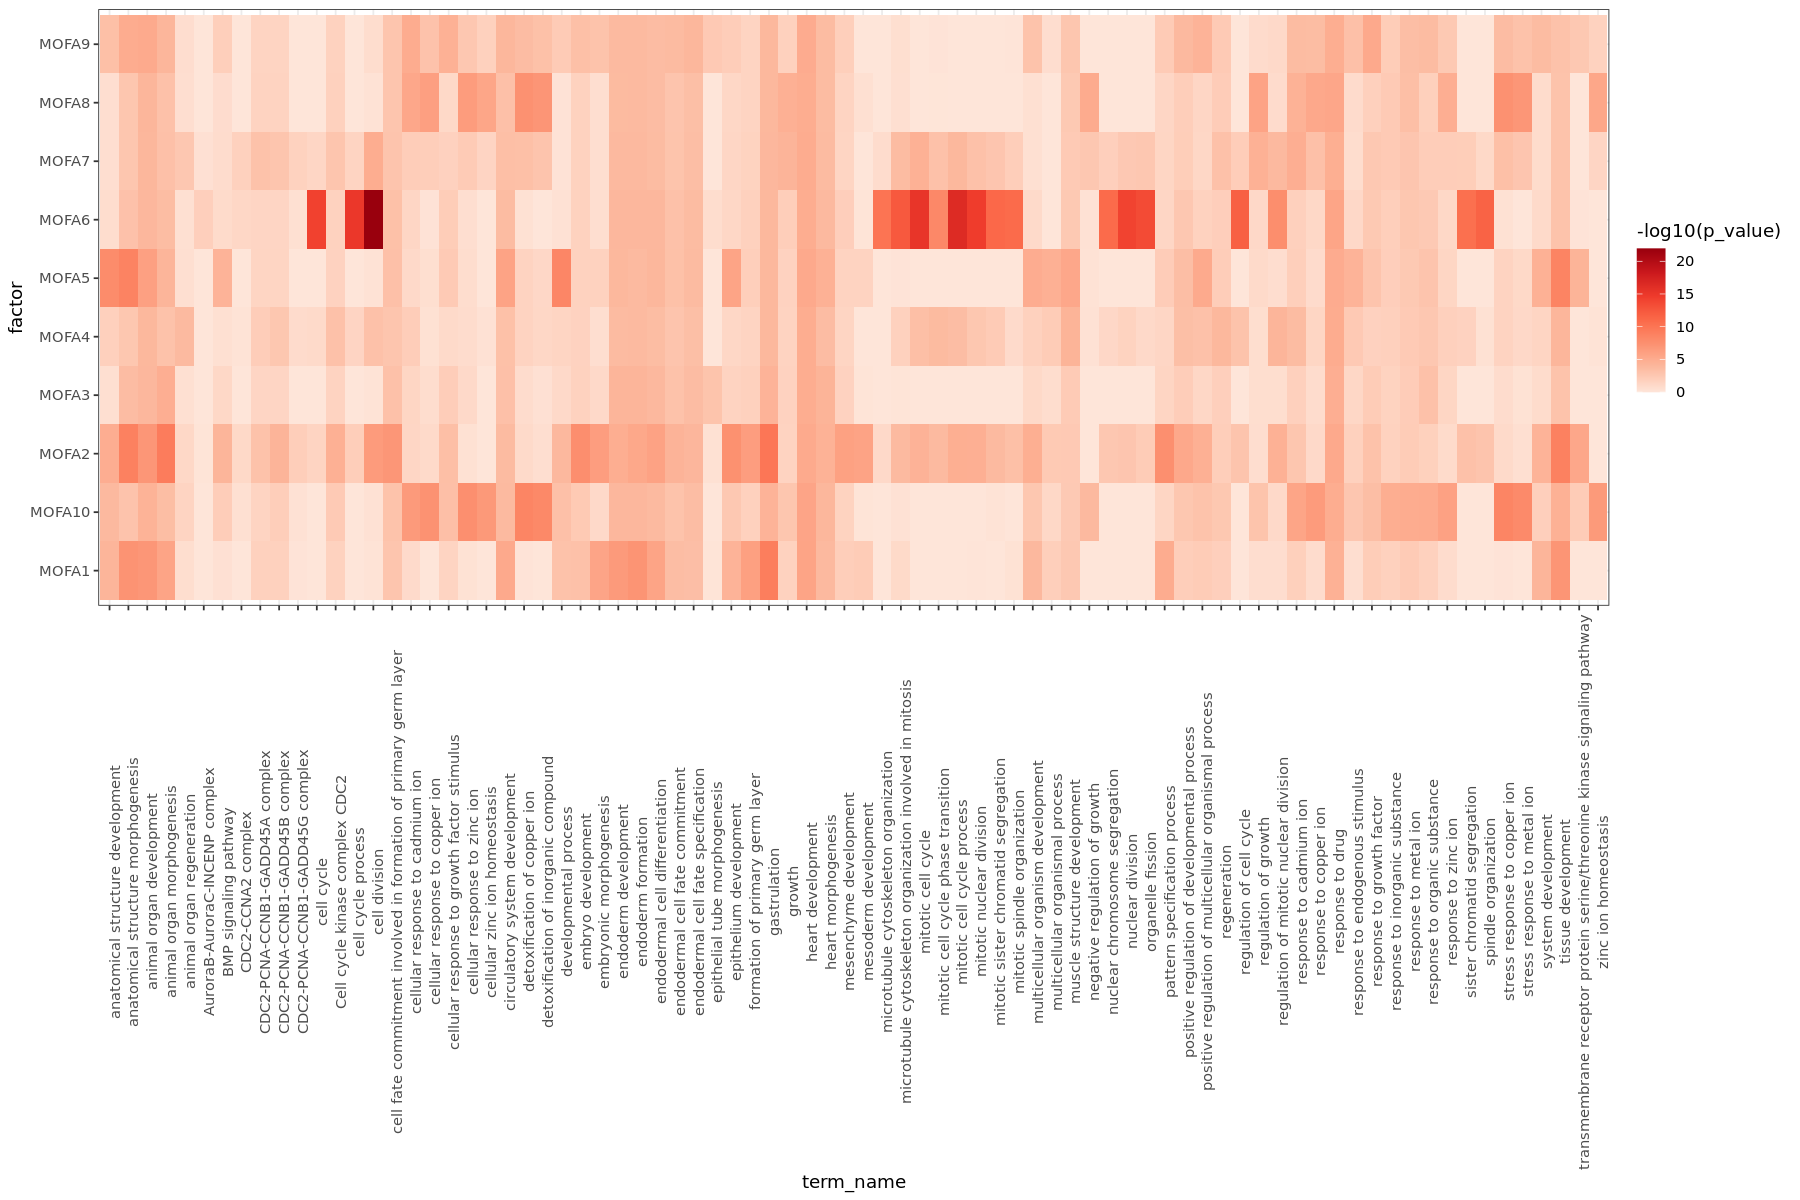

In [9]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=factor, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [24]:
mat = matrix(0, nrow=length(unique(df_to_plot$factor)), ncol=length(unique(df_to_plot$term_name)))
for (i in 1:nrow(mat)){
    factor = unique(df_to_plot$factor)[i]
    for (j in 1:ncol(mat)){
        term = unique(df_to_plot$term_name)[j]
#         print(term)
        if (length(df_to_plot[df_to_plot$factor == factor & df_to_plot$term_name == term,"p_value"]) == 0){next}
        mat[i,j] = min(df_to_plot[df_to_plot$factor == factor & df_to_plot$term_name == term,"p_value"])
    }
}
rownames(mat) = unique(df_to_plot$factor)
colnames(mat) = unique(df_to_plot$term_name)

In [25]:
mat0 = -log10(mat)
mat0[mat0==Inf] = -1

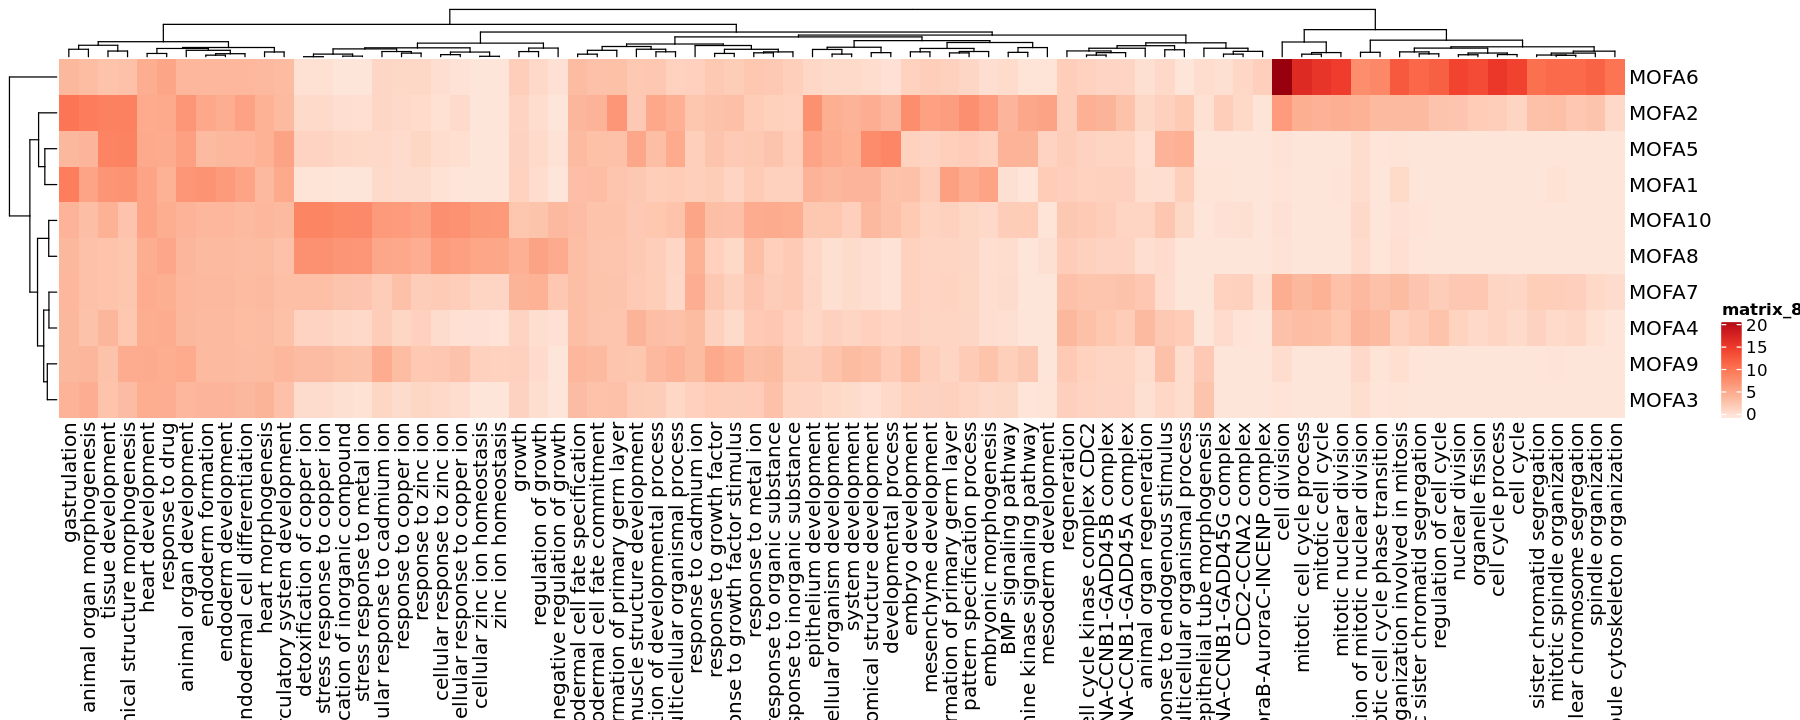

In [26]:
options(repr.plot.width = 15, repr.plot.height = 6)
Heatmap(mat0, col = brewer.pal(7,"Reds"))

In [ ]:
cell response to ion

In [56]:
mat

,CDC2-PCNA-CCNB1-GADD45A complex,CDC2-PCNA-CCNB1-GADD45B complex,Cell cycle kinase complex CDC2,CDC2-PCNA-CCNB1-GADD45G complex,CDC2-CCNA2 complex,AuroraB-AuroraC-INCENP complex,gastrulation,anatomical structure morphogenesis,endoderm formation,tissue development,...,sister chromatid segregation,microtubule cytoskeleton organization,mitotic cell cycle,nuclear division,mitotic sister chromatid segregation,nuclear chromosome segregation,stress response to metal ion,mitotic cell cycle process,cellular response to copper ion,detoxification of inorganic compound
MOFA1,0.0188634904,1.886349e-02,2.186575e-02,0.702979410,1.00000000,1.00000000,6.336525e-10,5.802033e-08,7.240216e-08,8.120846e-08,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
MOFA2,0.0009116711,5.629527e-05,2.278852e-05,0.009663117,0.08491759,0.77956188,1.236092e-10,1.230118e-09,3.974762e-06,1.246957e-09,...,7.458215e-04,9.512485e-02,3.671157e-05,1.736929e-03,1.707797e-04,2.403936e-03,3.262287e-01,1.664495e-05,1.150192e-01,2.567647e-01
MOFA3,0.0446932102,4.469321e-02,2.963126e-02,1.000000000,1.00000000,1.00000000,4.366171e-05,2.977488e-04,6.769877e-05,1.062849e-03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.120470e-01,1.000000e+00,2.006354e-01,4.036213e-01
MOFA4,0.0085365738,2.252210e-03,7.456051e-04,0.147973388,0.66143433,1.00000000,1.165610e-04,2.259927e-03,1.831369e-04,7.226907e-05,...,2.351023e-02,1.000000e+00,5.068314e-04,2.584516e-02,5.252307e-03,6.589962e-02,7.817879e-02,3.605067e-04,4.166415e-01,6.130452e-02
MOFA5,0.0379388290,3.793883e-02,2.424937e-02,1.000000000,1.00000000,1.00000000,1.083599e-04,1.684337e-09,1.750755e-04,2.206823e-09,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.485593e-02,1.000000e+00,2.739790e-01,6.655219e-02
MOFA6,0.0427332707,4.273327e-02,2.210992e-02,0.375858625,0.06416705,0.01328178,1.123915e-04,8.111082e-04,1.001811e-04,1.062849e-03,...,3.360614e-11,7.276220e-11,5.023212e-16,7.432744e-15,7.695288e-12,1.249585e-11,1.000000e+00,3.674038e-17,5.998393e-01,9.867039e-01
MOFA7,0.0008903454,1.580691e-03,1.684752e-03,0.022571152,0.01932847,0.40651482,1.006941e-04,2.016417e-03,1.458960e-04,1.062849e-03,...,9.101643e-03,1.675196e-01,2.760143e-05,3.296239e-03,1.785951e-03,1.339265e-02,1.775640e-03,1.188433e-04,9.908374e-03,1.385269e-03
MOFA8,0.0298644134,2.986441e-02,1.808811e-02,0.981977395,1.00000000,1.00000000,1.123915e-04,1.824071e-03,1.790658e-04,1.062849e-03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.188831e-07,1.000000e+00,6.807456e-07,9.248094e-08
MOFA9,0.0342073041,3.420730e-02,2.136215e-02,1.000000000,1.00000000,1.00000000,1.083599e-04,9.885237e-06,1.750755e-04,8.854054e-04,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.576909e-04,1.000000e+00,9.824983e-04,6.687747e-04
MOFA10,0.0322918453,1.026673e-02,4.866908e-03,0.450839207,0.35540015,1.00000000,4.366171e-05,1.141611e-03,1.001811e-04,2.882802e-05,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.747705e-01,1.000000e+00,8.507414e-09,1.000000e+00,4.877312e-08,6.617170e-09


In [57]:
df_to_plot

,p_value,factor,term_name,term_id
1,1.886349e-02,MOFA1,CDC2-PCNA-CCNB1-GADD45A complex,CORUM:5544
2,1.886349e-02,MOFA1,CDC2-PCNA-CCNB1-GADD45B complex,CORUM:5545
3,2.186575e-02,MOFA1,Cell cycle kinase complex CDC2,CORUM:310
4,7.029794e-01,MOFA1,CDC2-PCNA-CCNB1-GADD45G complex,CORUM:5546
145,1.000000e+00,MOFA1,CDC2-CCNA2 complex,CORUM:5557
174,1.000000e+00,MOFA1,AuroraB-AuroraC-INCENP complex,CORUM:6184
244,6.336525e-10,MOFA1,gastrulation,GO:0007369
245,5.802033e-08,MOFA1,anatomical structure morphogenesis,GO:0009653
246,7.240216e-08,MOFA1,endoderm formation,GO:0001706
247,8.120846e-08,MOFA1,tissue development,GO:0009888
